In [1]:
#Description:
#   SQL Homework Bonus Exercise
#
#  https://www.mssqltips.com/sqlservertip/5173/encrypting-passwords-for-use-with-python-and-sql-server/
#
#Modification History:
#   DD-MMM-YYY  Author          Description
#   23-07-2019  Stacey Smith    INITIAL CREATION

In [31]:
#Dependencies and imports

from sqlalchemy import create_engine
from cryptography.fernet import Fernet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Deal with password needed for sql conn
key = b'R_frnvbIOy25RMAXZtlk5yOn9x6m71YhQnfkpr2QM5w='
cipher_suite = Fernet(key)

with open('postgres.bin', 'rb') as file_object:
    for line in file_object:
        encryptedpwd = line
        
uncipher_text = (cipher_suite.decrypt(encryptedpwd))
pword = bytes(uncipher_text).decode("utf-8")

In [17]:
#Connect to database
engine = create_engine('postgresql://postgres:' + pword + '@localhost:5432/09-SQL_Homework')
connection = engine.connect()

In [25]:
#Write query
Query = pd.read_sql_query(
'SELECT T.title, AVG(S.salary) FROM titles T JOIN salary S ON T.emp_no = S.emp_no GROUP BY T.title', connection)

,title,avg
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


In [26]:
#Create dataframe
sql_df = pd.DataFrame(Query)

,title,avg
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


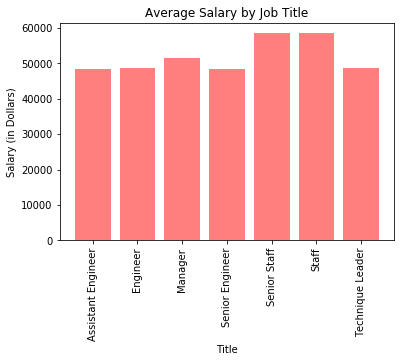

In [35]:
#Bar chart
title = sql_df['title']
salary = round(sql_df['avg'])
x_axis = np.arange(len(title))

plt.bar(x_axis, salary, color='red', alpha=0.5, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title, rotation="vertical")

plt.title("Average Salary by Job Title")
plt.xlabel("Title")
plt.ylabel("Salary (in Dollars)")

plt.savefig("Average_Salary_by_Job_Title.png")